In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

Populating the interactive namespace from numpy and matplotlib


In [2]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv")

In [3]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 1) Explore the data

In [4]:
genes.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
2598,2599,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,...,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,2600,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,...,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,2601,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,...,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671
2601,2602,-0.136738,-0.473996,-0.065985,-0.389660,-0.246289,-0.234996,0.446785,-0.226391,-0.231487,...,-0.009820,0.317453,0.242149,-0.427865,0.213364,-0.634293,-0.008888,-0.313828,-0.471017,-0.023894
2602,2603,-0.202742,-0.143678,0.357981,-0.806248,0.108837,0.101487,0.813528,0.589563,0.368431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
genes = genes.dropna()

In [6]:
genes.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
2597,2598,-0.333845,0.272029,-0.170722,0.038204,-0.097601,-0.592688,0.338378,-0.152175,0.302457,...,-0.559128,0.236490,0.171963,0.124660,1.121866,-0.486518,-0.642105,-0.423110,-0.269496,0.510805
2598,2599,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,...,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,2600,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,...,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,2601,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,...,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671
2601,2602,-0.136738,-0.473996,-0.065985,-0.389660,-0.246289,-0.234996,0.446785,-0.226391,-0.231487,...,-0.009820,0.317453,0.242149,-0.427865,0.213364,-0.634293,-0.008888,-0.313828,-0.471017,-0.023894


In [229]:
genes.drop(genes.columns[[0]], axis=1, inplace=True)

In [7]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 2) Preprocess the data

In [8]:
scaledgenes = skl.preprocessing.scale(genes)

/Users/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [9]:
scaledgenes

array([[-1.73138527, -0.14601929, -1.48885627, ...,  1.09802038,
         0.43679723,  1.00690557],
       [-1.73005395, -0.79272802,  0.46433166, ...,  0.92310118,
        -0.7496697 ,  0.6306221 ],
       [-1.72872263, -0.02985374, -0.58685532, ..., -0.42086741,
        -0.56521196, -0.06347335],
       ...,
       [ 1.72872263, -0.18957236, -0.89910719, ..., -1.09357127,
        -0.56646353,  1.04572608],
       [ 1.73005395, -1.45570084, -0.89836852, ..., -0.32237148,
        -1.17806261,  0.18583484],
       [ 1.73138527, -0.12657512, -1.35418784, ..., -0.65163444,
        -0.66869512, -0.03931063]])

In [10]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([-0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,
        -0.,  0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,
        -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

In [13]:
twodproj = skl.manifold.TSNE().fit_transform(scaledgenes)

In [14]:
twodproj.shape

(2602, 2)

In [15]:
twodproj

array([[-14.085082 , -17.578783 ],
       [-14.100917 , -17.593485 ],
       [ -5.8118987,   3.5575116],
       ...,
       [-17.434633 ,  27.767052 ],
       [ 13.816177 ,  45.34294  ],
       [-14.952593 ,   5.684831 ]], dtype=float32)

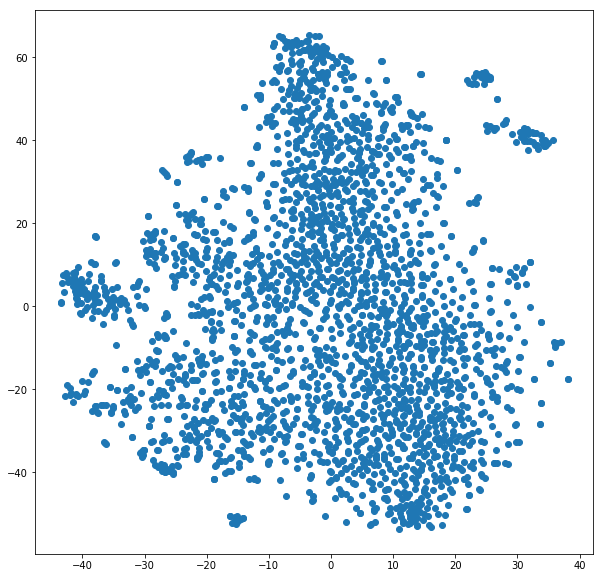

In [18]:

pl.figure(figsize = (10,10))
x = twodproj[:,0]
y = twodproj[:,1]
plt.plot(x,y,"o")

In [28]:
def edistance(x,center):
  """eucledian distance"""
  return np.sqrt(((x - center)**2).sum(axis=1))
def calcICVar(X, labels, model,n_clusters):
  icv = np.zeros(n_clusters) 
  for i in range(n_clusters):
    icv[i] = ((edistance(model.cluster_centers_[i], X[labels==i])**2).sum() / ((labels == i).sum() - 1)).sum()
    
    #icv[i] = (edistance(model.cluster_centers_[i], X[labels==i])**2).sum()


  return(icv.sum())

# 3) K-Means Clustering

In [25]:
kmeansmod  = skl.cluster.KMeans(n_clusters=10).fit(twodproj)

In [26]:
kmeansmod.cluster_centers_

array([[ -2.2911487 ,  26.96761   ],
       [ -7.896107  , -29.620491  ],
       [ 16.549238  , -16.24961   ],
       [ -2.010734  ,  51.721497  ],
       [-29.140703  ,   8.402549  ],
       [ 20.966202  ,  41.699535  ],
       [ 12.822482  , -39.746212  ],
       [ -7.4461055 ,   0.19458139],
       [ 12.62147   ,   6.231516  ],
       [-26.90911   , -23.912464  ]], dtype=float32)

Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

Text(0, 0.5, 'Intracluster Variance')

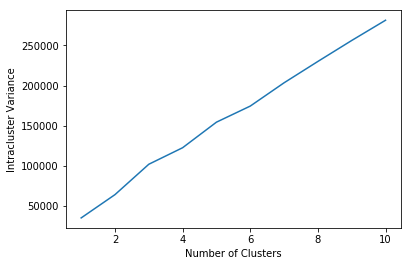

In [27]:
X = np.vstack([twodproj])

VarArray = []
for i in range(1,11):
  VarArray.append(calcICVar(X, kmeansmod.labels_, kmeansmod, i))

x = np.arange(1,11,1)
y = VarArray
plt.plot(x,y)
plt.xlabel("Number of Clusters")
plt.ylabel("Intracluster Variance")

The Intracluster Variance as a function of the number of clusters. Four appears to be the optimal number of clusters, but it is difficult to tell.

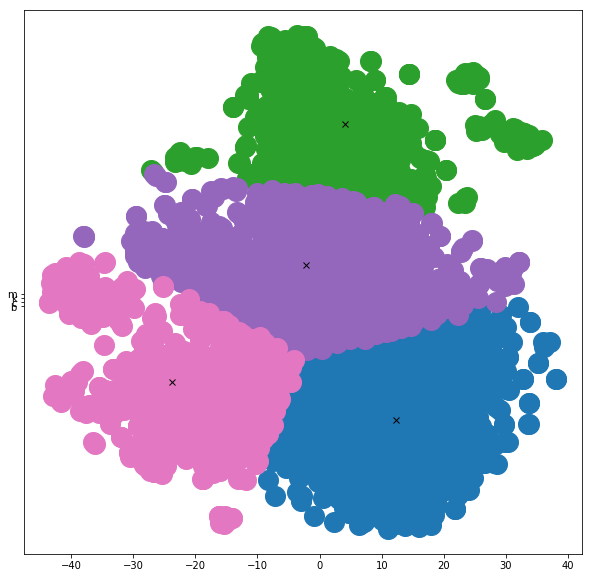

In [29]:
pl.figure(figsize = (10,10))
kmeansmod  = skl.cluster.KMeans(n_clusters=4).fit(twodproj)


pl.plot(twodproj[kmeansmod.labels_ == 0][:,0], twodproj[kmeansmod.labels_ == 0][:,1],"o",'b',ms=20)
pl.plot(twodproj[kmeansmod.labels_ == 1][:,0], twodproj[kmeansmod.labels_ == 1][:,1],"o",'c',ms=20)
pl.plot(twodproj[kmeansmod.labels_ == 2][:,0], twodproj[kmeansmod.labels_ == 2][:,1],"o",'k',ms=20)
pl.plot(twodproj[kmeansmod.labels_ == 3][:,0], twodproj[kmeansmod.labels_ == 3][:,1],"o",'m',ms=20) #something weird is going on here

pl.plot(kmeansmod.cluster_centers_[3,0], kmeansmod.cluster_centers_[3,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[2,0], kmeansmod.cluster_centers_[2,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[1,0], kmeansmod.cluster_centers_[1,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[0,0], kmeansmod.cluster_centers_[0,1], 'kx')

My first cluster plot before realizing there was condensed code. This plot features marked centers.

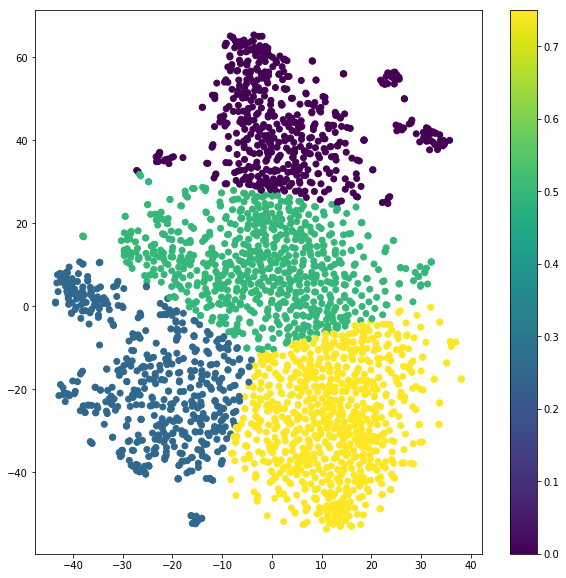

In [30]:
pl.figure(figsize = (10,10))
geneclustersKM = cluster.KMeans(n_clusters=4).fit(twodproj)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();

The clusters on the TSNE projection. There are four clusters indicated by different colors.

# 4) Agglomerative Hierarchical Clustering

In [34]:
model = skl.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean')
model.fit(scaledgenes[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

<Figure size 432x288 with 0 Axes>

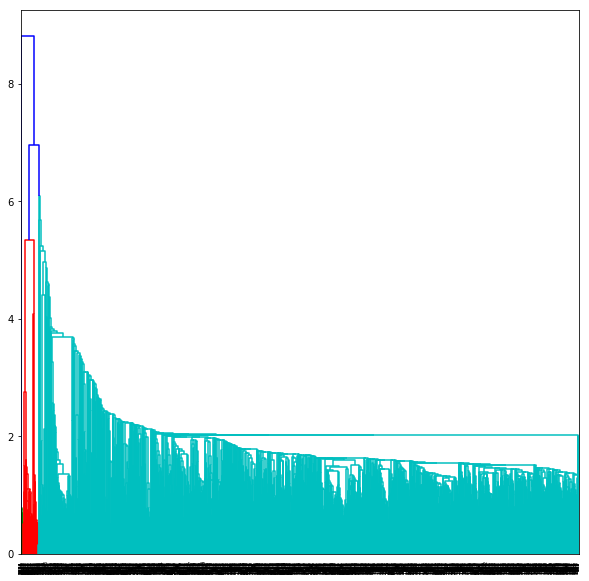

In [35]:
Z = hierarchy.linkage(twodproj)
plt.figure()
pl.figure(figsize = (10,10))
dn = hierarchy.dendrogram(Z)

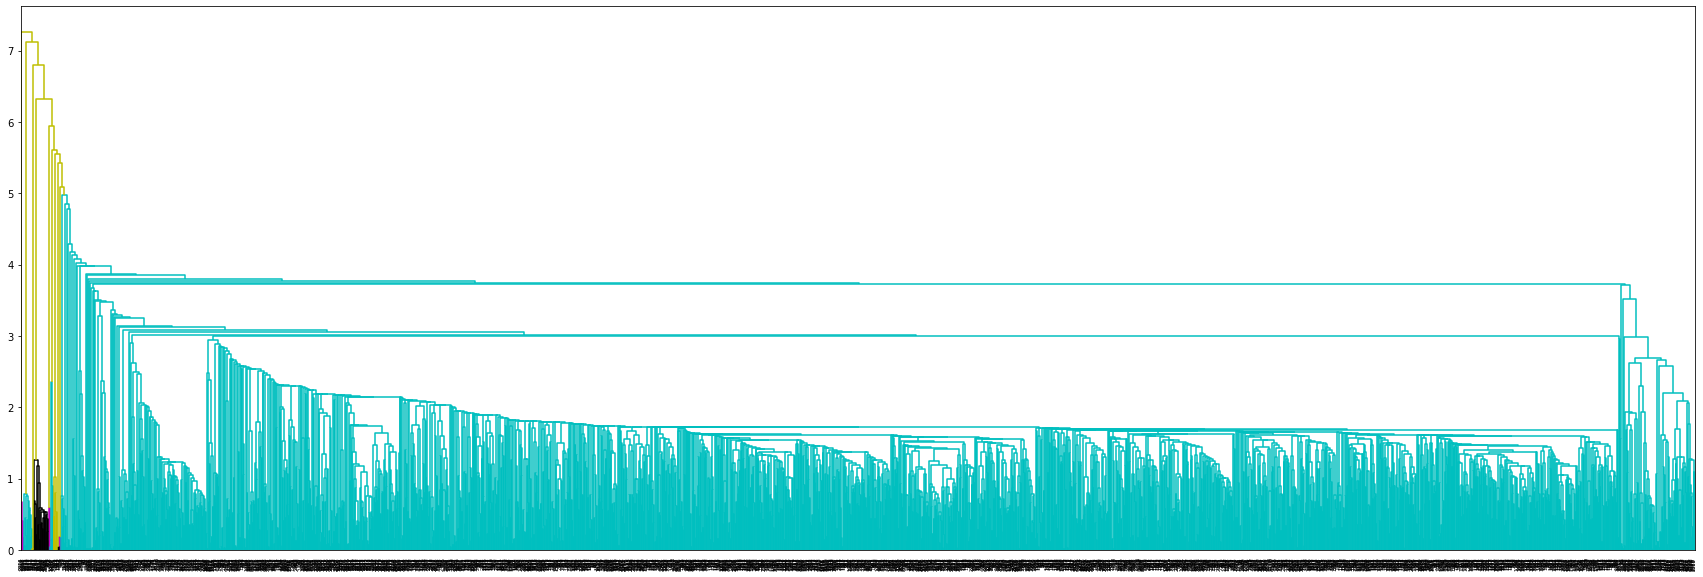

In [246]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
pl.figure(figsize = (30,10))
dn1 = hierarchy.dendrogram(Z,  above_threshold_color='y')

hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()



---

<h1 style="color:red"> when read in data, you forgot to drop column Unnamed 0, which is not a feature (-2pts), should create kmeansmod seperately for each n_clusters from 1 to 10, and then plot variance vs n_clusters(-3pt), repeat agglomerative clustering with a different linkage and comment on differences (-2pts), also plot 2D TSNE projection for agglomerative clustering (-1pt)</h1>

